In [1]:
import kagglehub

path = kagglehub.dataset_download("mrdheer/cars-dataset")

print("Path to dataset files:", path)


100%|██████████| 108k/108k [00:00<00:00, 29.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrdheer/cars-dataset/versions/1


In [2]:
import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/mrdheer/cars-dataset/versions/1/cars.csv')
display(df.head())

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


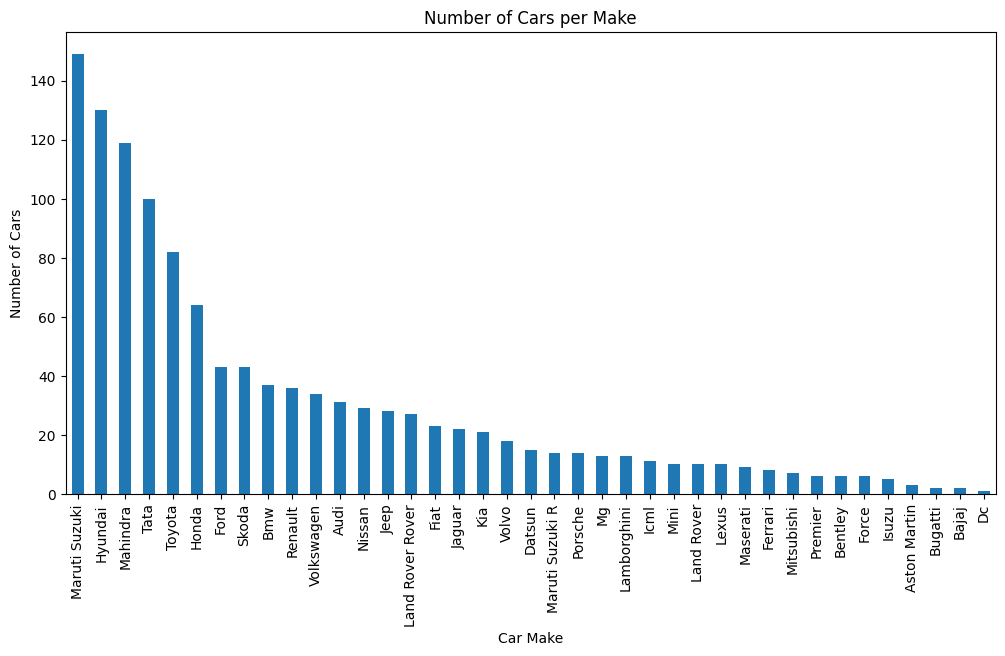

In [3]:
import matplotlib.pyplot as plt

car_counts = df['Make'].value_counts()

plt.figure(figsize=(12, 6))
car_counts.plot(kind='bar')
plt.title('Number of Cars per Make')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()

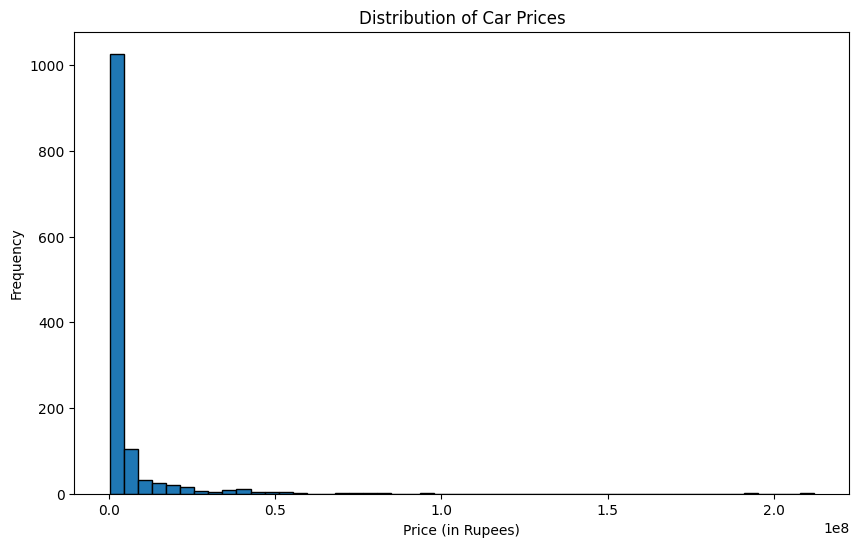

In [4]:
import matplotlib.pyplot as plt

df['Ex-Showroom_Price_cleaned'] = df['Ex-Showroom_Price'].str.replace('Rs. ', '', regex=False).str.replace(',', '', regex=False)
df['Ex-Showroom_Price_cleaned'] = pd.to_numeric(df['Ex-Showroom_Price_cleaned'])

plt.figure(figsize=(10, 6))
plt.hist(df['Ex-Showroom_Price_cleaned'], bins=50, edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Rupees)')
plt.ylabel('Frequency')
plt.show()

In [5]:
print(df.columns)

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Automatic_Headlamps', 'Engine_Type', 'ASR_/_Traction_Control',
       'Cruise_Control', 'USB_Ports', 'Heads-Up_Display', 'Welcome_Lights',
       'Battery', 'Electric_Range', 'Ex-Showroom_Price_cleaned'],
      dtype='object', length=141)


In [6]:
print([col for col in df.columns if 'Fuel' in col])

['Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Average_Fuel_Consumption', 'Fuel-lid_Opener', 'Fuel_Gauge', 'Low_Fuel_Warning']


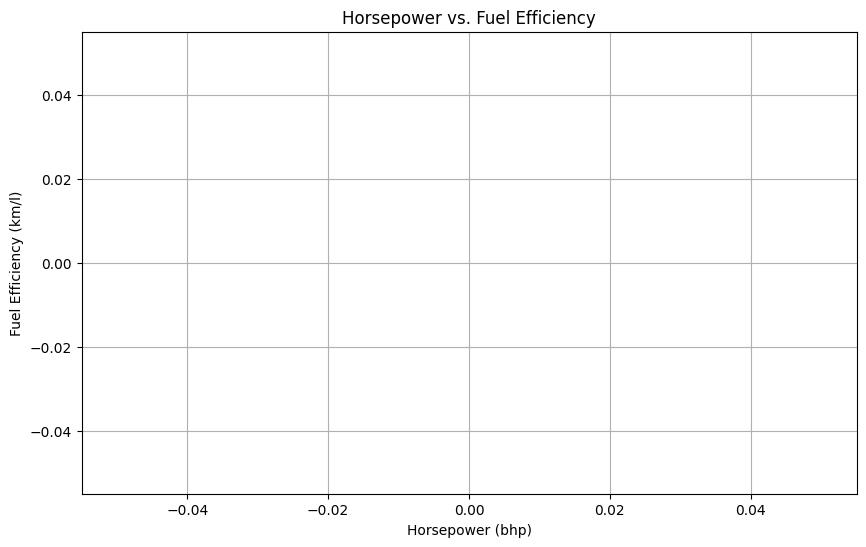

In [7]:
df['Fuel_Efficiency_cleaned'] = df['Average_Fuel_Consumption'].astype(str).str.replace(' km/l', '', regex=False).str.extract(r'(\d+\.?\d*)').astype(float)
df['Power_cleaned'] = df['Power'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

df_cleaned = df.dropna(subset=['Power_cleaned', 'Fuel_Efficiency_cleaned']).copy()

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Power_cleaned'], df_cleaned['Fuel_Efficiency_cleaned'], alpha=0.5)
plt.title('Horsepower vs. Fuel Efficiency')
plt.xlabel('Horsepower (bhp)')
plt.ylabel('Fuel Efficiency (km/l)')
plt.grid(True)
plt.show()

In [8]:
display(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 143 entries, Make to Power_cleaned
dtypes: float64(8), int64(1), object(134)
memory usage: 0.0+ bytes


None

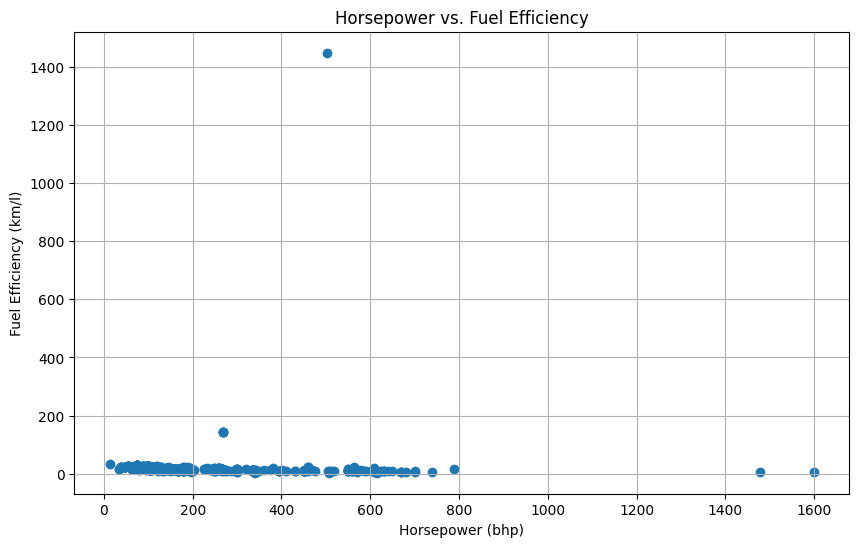

In [9]:
df['Power_cleaned'] = df['Power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Fuel_Efficiency_cleaned'] = df['ARAI_Certified_Mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df_scatter = df.dropna(subset=['Power_cleaned', 'Fuel_Efficiency_cleaned'])

plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Power_cleaned'], df_scatter['Fuel_Efficiency_cleaned'])
plt.title('Horsepower vs. Fuel Efficiency')
plt.xlabel('Horsepower (bhp)')
plt.ylabel('Fuel Efficiency (km/l)')
plt.grid(True)
plt.show()

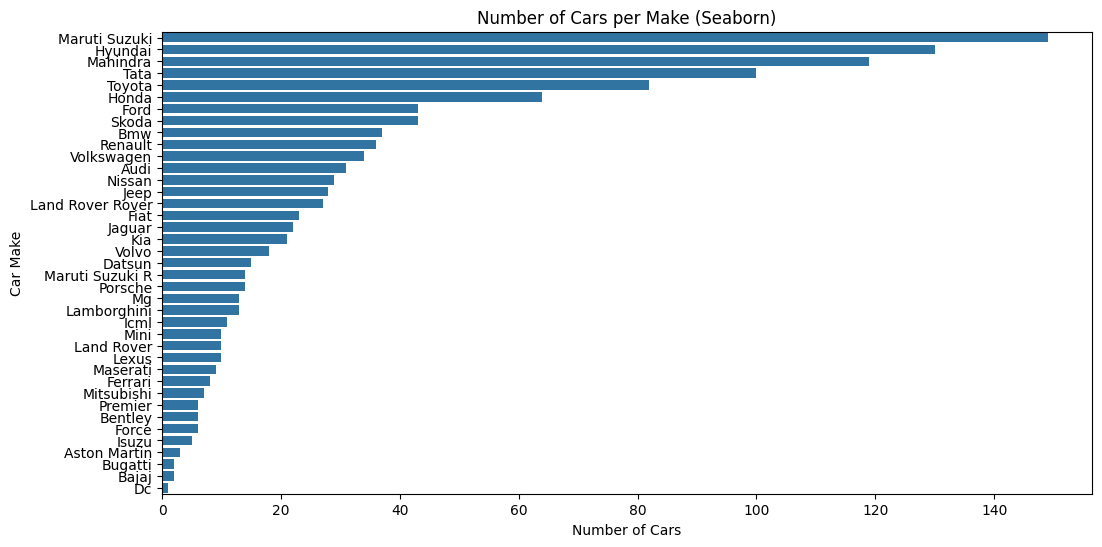

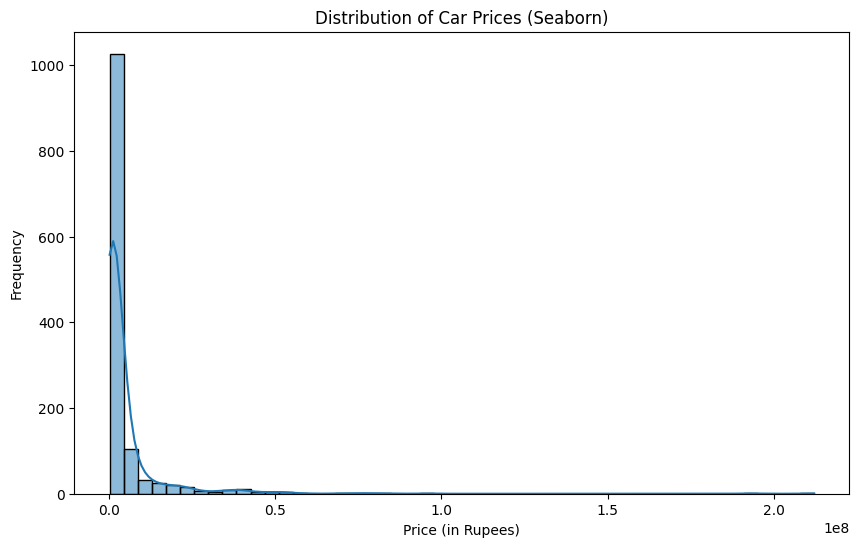

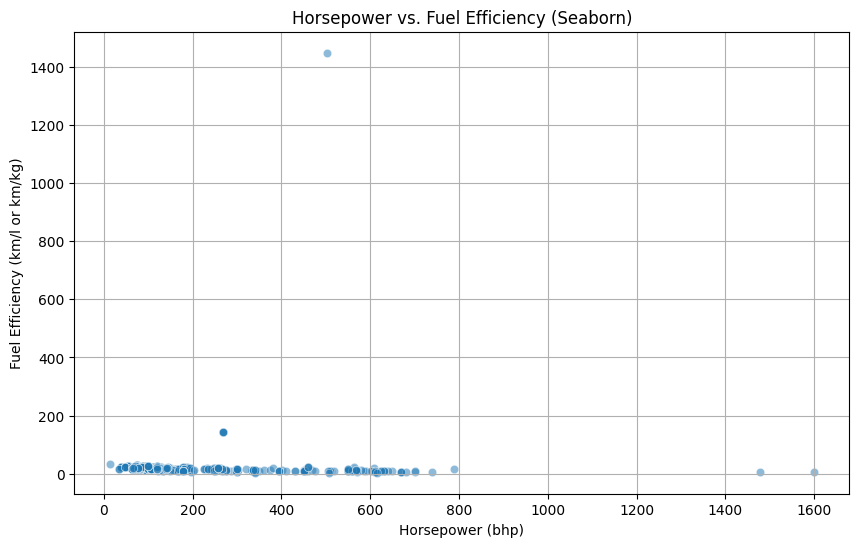

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(12, 6))
sns.countplot(y='Make', data=df, order = df['Make'].value_counts().index)
plt.title('Number of Cars per Make (Seaborn)')
plt.xlabel('Number of Cars')
plt.ylabel('Car Make')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Ex-Showroom_Price_cleaned'], bins=50, kde=True)
plt.title('Distribution of Car Prices (Seaborn)')
plt.xlabel('Price (in Rupees)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power_cleaned', y='Fuel_Efficiency_cleaned', data=df_scatter, alpha=0.5)
plt.title('Horsepower vs. Fuel Efficiency (Seaborn)')
plt.xlabel('Horsepower (bhp)')
plt.ylabel('Fuel Efficiency (km/l or km/kg)')
plt.grid(True)
plt.show()